<a href="https://colab.research.google.com/github/HansMisra/Time-Series-Forecasting-with-LSTM-and-ARIMA/blob/main/Copy_of_lstm_model_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance pandas matplotlib

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

#Real Time Data Integration

def fetch_real_time_data(ticker, period="1d", interval="15m"):
    """


    :param period: The period over which to fetch data (default is '1d' which gives us daily data).
    :param interval: The interval between data points (default is '15m' I put the 15 minute interval but we can change that).
    :return: A Pandas DataFrame containing the real-time stock data.
    """
    stock_data = yf.Ticker(ticker)
    real_time_data = stock_data.history(period=period, interval=interval)
    return real_time_data

ticker_symbol = "META"
real_time_stock_data = fetch_real_time_data(ticker_symbol)

hist_data = yf.Ticker(ticker_symbol).history(period="365d")

In [3]:
pip install tensorflow

Epoch 1/10
8/8 [==============================] - 12s 123ms/step - loss: 0.0776
Epoch 2/10
8/8 [==============================] - 1s 134ms/step - loss: 0.0135
Epoch 3/10
8/8 [==============================] - 1s 105ms/step - loss: 0.0135
Epoch 4/10
8/8 [==============================] - 1s 122ms/step - loss: 0.0065
Epoch 5/10
8/8 [==============================] - 1s 137ms/step - loss: 0.0041
Epoch 6/10
8/8 [==============================] - 1s 158ms/step - loss: 0.0029
Epoch 7/10
8/8 [==============================] - 1s 170ms/step - loss: 0.0028
Epoch 8/10
8/8 [==============================] - 1s 154ms/step - loss: 0.0026
Epoch 9/10
8/8 [==============================] - 1s 192ms/step - loss: 0.0025
Epoch 10/10
2/2 [==============================] - 0s 18ms/step
Train RMSE: 12.205068342950385, Test RMSE: 10.682146110191455


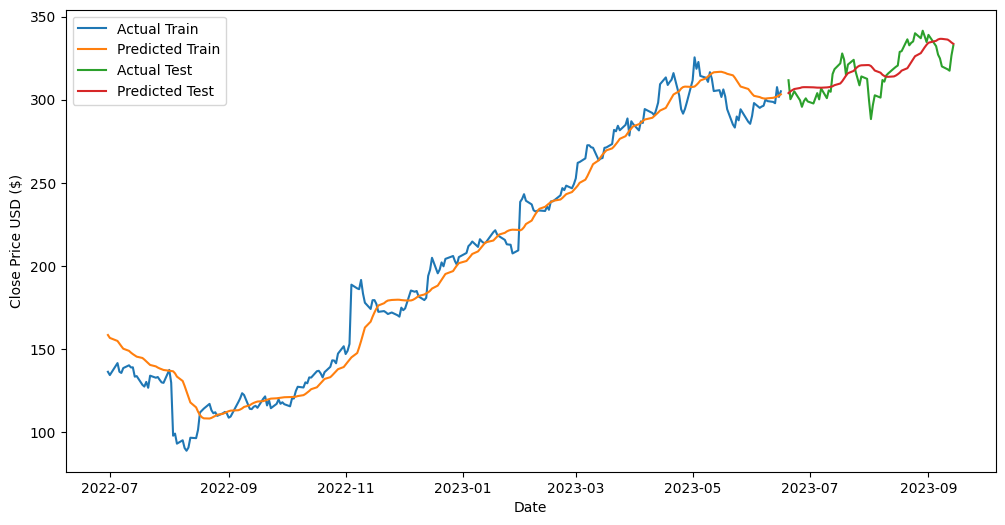

In [4]:

from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data = hist_data[['Close']].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Function to create a dataset for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Time step for the sequences
time_step = 60
X, y = create_dataset(scaled_data, time_step)

# Splitting data into train and test sets
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input for LSTM [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)

# Predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Invert predictions to original scale
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
actual_y_train = scaler.inverse_transform([y_train])
actual_y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(actual_y_train[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(actual_y_test[0], test_predict[:,0]))
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")

# Plotting
plt.figure(figsize=(12,6))
plt.plot(hist_data.index[:len(actual_y_train[0])], actual_y_train[0], label="Actual Train")
plt.plot(hist_data.index[:len(train_predict)], train_predict, label="Predicted Train")
plt.plot(hist_data.index[len(actual_y_train[0]):len(actual_y_train[0])+len(test_predict)], actual_y_test[0], label="Actual Test")
plt.plot(hist_data.index[len(actual_y_train[0]):len(actual_y_train[0])+len(test_predict)], test_predict, label="Predicted Test")
plt.xlabel("Date")
plt.ylabel("Close Price USD ($)")
plt.legend()
plt.show()

In [5]:
# model.save("lstm_model.h5")


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
# from google.colab import files

# files.download('lstm_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [7]:
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf

# Function to create dataset for LSTM
def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

# Fetch historical data
ticker_symbol = "META"
hist_data = yf.Ticker(ticker_symbol).history(period="365d")
data = hist_data[['Close']].values

# Scale data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Create dataset
time_step = 60
X, y = create_dataset(scaled_data, time_step)
X = X.reshape(X.shape[0], X.shape[1], 1)

# Split data into train and test sets
train_size = int(len(X) * 0.80)
X_train, y_train = X[:train_size], y[:train_size]

# Build LSTM model
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, batch_size=32, epochs=10)


Epoch 1/10
8/8 [==============================] - 9s 101ms/step - loss: 0.1507
Epoch 2/10
8/8 [==============================] - 1s 107ms/step - loss: 0.0243
Epoch 3/10
8/8 [==============================] - 1s 97ms/step - loss: 0.0143
Epoch 4/10
8/8 [==============================] - 1s 136ms/step - loss: 0.0069
Epoch 5/10
8/8 [==============================] - 1s 135ms/step - loss: 0.0047
Epoch 6/10
8/8 [==============================] - 2s 208ms/step - loss: 0.0032
Epoch 7/10
8/8 [==============================] - 2s 198ms/step - loss: 0.0028
Epoch 8/10
8/8 [==============================] - 2s 207ms/step - loss: 0.0026
Epoch 9/10
8/8 [==============================] - 1s 178ms/step - loss: 0.0025
Epoch 10/10
8/8 [==============================] - 1s 146ms/step - loss: 0.0025


In [8]:
!pip install flask_ngrok

In [9]:
!pip install pyngrok==4.1.1
!ngrok authtoken 2ZQUlU8Nyqbd76K1LimVc2LruiI_5PW1au4A6Z9cG4QCUAKTe

  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-4.1.1-py3-none-any.whl size=15963 sha256=a441a487cc624090a7ae10d75995e17d1d44e7afe28c314320cd79239f160602
  Stored in directory: /root/.cache/pip/wheels/4c/7c/4c/632fba2ea8e88d8890102eb07bc922e1ca8fa14db5902c91a8
Successfully built pyngrok
Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [10]:
# from flask import Flask
# from flask_ngrok import run_with_ngrok
# app=Flask(__name__)
# run_with_ngrok(app)
# @app.route("/")
# def home():
#   return "<h1> Welcome </h1>"

# app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://6960-34-91-84-151.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 04:23:59] "GET / HTTP/1.1" 200 -


In [12]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [31]:
# from flask.templating import render_template
# from flask import Flask
# from flask_ngrok import run_with_ngrok
# templates_folder='/content/gdrive/MyDrive/Colab Notebooks/Flaskatcolab/template'
# app=Flask(__name__,template_folder=templates_folder)
# run_with_ngrok(app)
# @app.route("/")
# @app.route("/home1")
# def home1():
#   return render_template('home.html')

# app.run()
from flask import Flask, render_template, request
from flask_ngrok import run_with_ngrok
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import yfinance as yf

templates_folder = '/content/gdrive/MyDrive/Colab Notebooks/Flaskatcolab/template'
app = Flask(__name__, template_folder=templates_folder, static_url_path='/content/gdrive/MyDrive/Colab Notebooks/Flaskatcolab/static')
run_with_ngrok(app)

def create_dataset(data, time_step=60):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step), 0]
        X.append(a)
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

def predict_price():
  try:
    # Fetch the latest historical data
    ticker_symbol = "META"
    hist_data = yf.Ticker(ticker_symbol).history(period="365d")
    data = hist_data[['Close']].values

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Create dataset
    time_step = 60
    X, _ = create_dataset(scaled_data, time_step)
    X = X[-1].reshape(1, time_step, 1)  # Use the last data point for prediction
    # Build LSTM model
    model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(time_step, 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
    ])

# Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
    model.fit(X_train, y_train, batch_size=32, epochs=10)

# Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

# Invert predictions to original scale
    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)
    actual_y_train = scaler.inverse_transform([y_train])
    actual_y_test = scaler.inverse_transform([y_test])
    # Use the trained model for prediction
    predicted_scaled_price = model.predict(X)

    # Inverse transform to get the actual price
    predicted_price = scaler.inverse_transform(predicted_scaled_price.reshape(1, -1))[0][0]

    return predicted_price
  except Exception as e:
      print(f"Error in predict_price: {str(e)}")
      return None

@app.route("/")
def home():
    return render_template('home.html')

@app.route("/predict", methods=['POST'])
def predict():
    print("Predict route triggered")
    if request.method == 'POST':
        predicted_price = predict_price()
        return render_template('home.html', predicted_price=predicted_price)

if __name__ == '__main__':
    app.run()

 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


 * Running on http://c9bf-34-91-84-151.ngrok-free.app
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 05:57:26] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 05:57:26] "GET /content/gdrive/MyDrive/Colab%20Notebooks/Flaskatcolab/static/styles.css HTTP/1.1" 404 -


Predict route triggered
Epoch 1/10
8/8 [==============================] - 6s 97ms/step - loss: 0.1029
Epoch 2/10
8/8 [==============================] - 1s 91ms/step - loss: 0.0195
Epoch 3/10
8/8 [==============================] - 1s 90ms/step - loss: 0.0116
Epoch 4/10
8/8 [==============================] - 1s 99ms/step - loss: 0.0050
Epoch 5/10
8/8 [==============================] - 1s 92ms/step - loss: 0.0030
Epoch 6/10
8/8 [==============================] - 1s 97ms/step - loss: 0.0025
Epoch 7/10
8/8 [==============================] - 1s 94ms/step - loss: 0.0024
Epoch 8/10
8/8 [==============================] - 1s 90ms/step - loss: 0.0023
Epoch 9/10
8/8 [==============================] - 1s 91ms/step - loss: 0.0022
Epoch 10/10
1/1 [==============================] - 0s 26ms/step


INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 05:57:44] "POST /predict HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [12/Dec/2023 05:57:45] "GET /content/gdrive/MyDrive/Colab%20Notebooks/Flaskatcolab/static/styles.css HTTP/1.1" 404 -
